In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_ds, test_ds), info = tfds.load('cats_vs_dogs', split=['train[:80%]', 'train[80%:]'],
                                      with_info=True, as_supervised=True)

IMG_SIZE = 150
def preprocess_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0
    return image, label

BATCH_SIZE = 32
train_ds = train_ds.map(preprocess_image).shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.map(preprocess_image).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.NSAWQW_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [3]:
data_augmentation = models.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

model = models.Sequential([
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
    data_augmentation,

    # Conv Block 1
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Conv Block 2
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Conv Block 3
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Dense Layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification (cat=0, dog=1)
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 150, 150, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 148, 148, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 74, 74, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 74, 74, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 72, 72, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 36, 36, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 36, 36, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 19,230,881 (73.36 MB)

 Trainable params: 19,229,409 (73.35 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [4]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(train_ds, epochs=20, validation_data=test_ds, callbacks=[early_stopping])

Epoch 1/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 53s 74ms/step - accuracy: 0.5839 - loss: 0.7740 - val_accuracy: 0.6277 - val_loss: 0.6943
Epoch 2/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 42s 71ms/step - accuracy: 0.7062 - loss: 0.5746 - val_accuracy: 0.7158 - val_loss: 0.5533
Epoch 3/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 42s 71ms/step - accuracy: 0.7568 - loss: 0.4966 - val_accuracy: 0.7702 - val_loss: 0.4885
Epoch 4/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 42s 71ms/step - accuracy: 0.8048 - loss: 0.4318 - val_accuracy: 0.7672 - val_loss: 0.6046
Epoch 5/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 42s 71ms/step - accuracy: 0.8263 - loss: 0.3854 - val_accuracy: 0.8007 - val_loss: 0.4715
Epoch 6/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 42s 71ms/step - accuracy: 0.8377 - loss: 0.3602 - val_accuracy: 0.8426 - val_loss: 0.3622
Epoch 7/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 42s 71ms/step - accuracy: 0.8495 - loss: 0.3378 - val_accuracy: 0.8667 - val_loss: 0.3199
Epoch 8/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 42s 71ms/step - accuracy: 0.8663 - loss: 0.3089 - 

In [5]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.4f}")

146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8794 - loss: 0.2644
Test accuracy: 0.8927


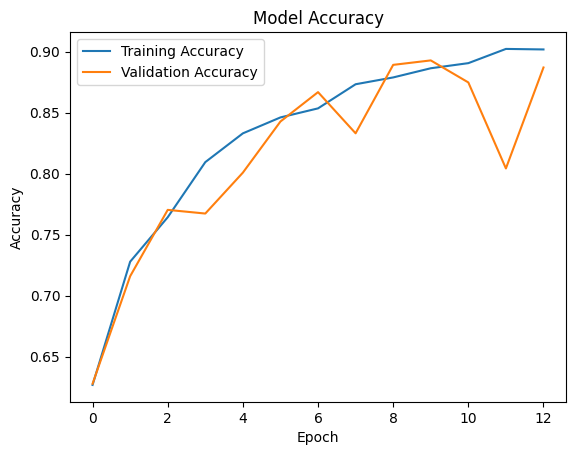

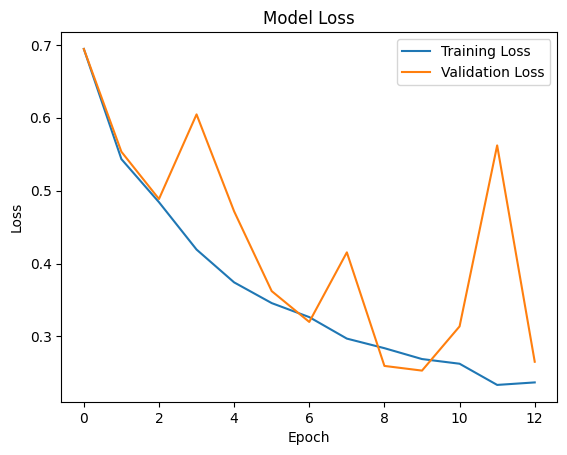

In [6]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted: Dog, Actual: Dog


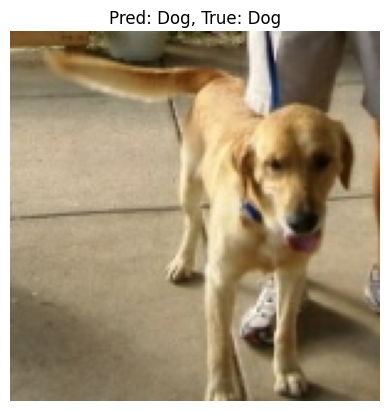

Predicted: Dog, Actual: Cat


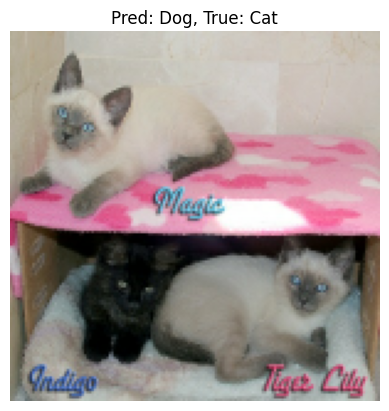

Predicted: Dog, Actual: Dog


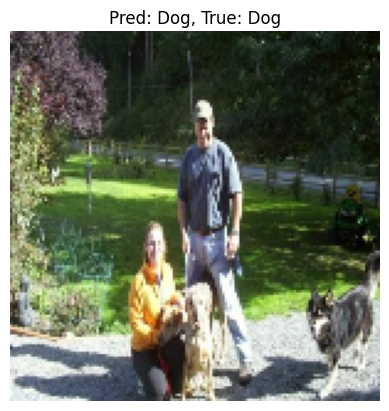

Predicted: Dog, Actual: Dog


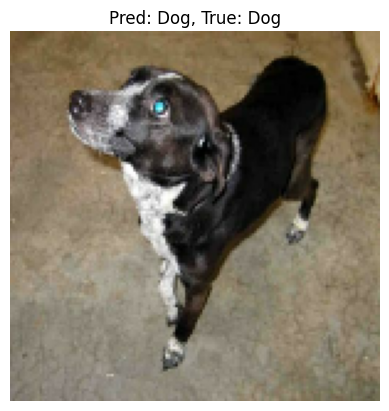

Predicted: Dog, Actual: Dog


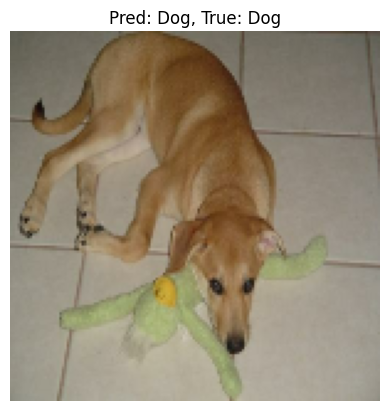

Predicted: Dog, Actual: Dog


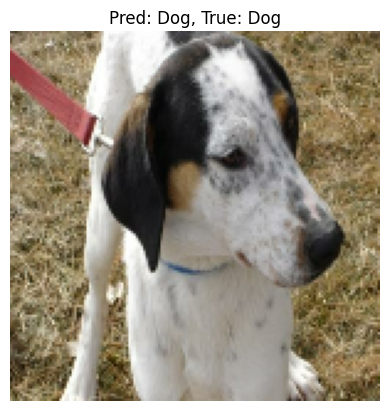

Predicted: Cat, Actual: Cat


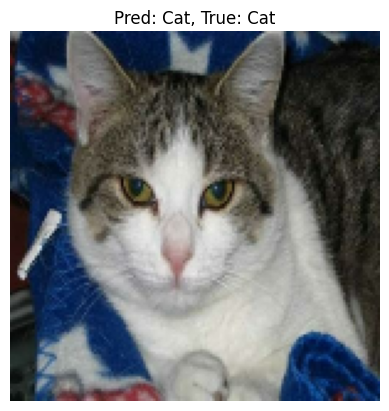

Predicted: Cat, Actual: Dog


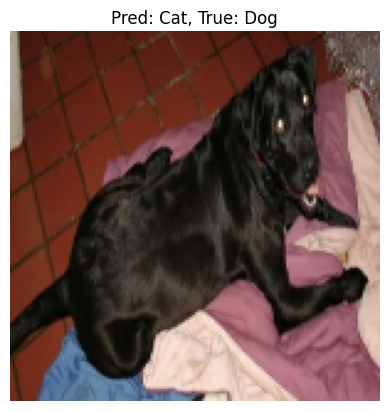

In [8]:
for images, labels in test_ds.take(1):
    predictions = model.predict(images)
    for i in range(8):
        pred = "Dog" if predictions[i] > 0.5 else "Cat"
        true = "Dog" if labels[i].numpy() == 1 else "Cat"
        print(f"Predicted: {pred}, Actual: {true}")
        plt.imshow(images[i].numpy())
        plt.title(f"Pred: {pred}, True: {true}")
        plt.axis('off')
        plt.show()